<center> <h3> DS 3500 — Fall 2021</h3> </center>
<center><h1> Natural Language Processing and Supervised Machine Learning Methods to Predict Stock Price Change from Earnings Call Transcripts </h1></center> 
<center><h4>  By: Qi Li, Kelly Phalen, Marco Tortolani, Emily Wang, Xinyu Wu </h4></center> 

## Outline
[1. PDFCleaner](#1.-PDFCleaner)

[2. StockPuller](#2.-StockPuller)

[3. PerformanceTester](#3.-PerformanceTester)

[4. Transcripts](#4.-Transcripts)

[5. Database](#5.-Database)

[6. Vectorizers](#6.-Vectorizers)

[7. Principal Component Analysis](#7.-Principal-Component-Analysis)

[8. Base Models](#8.-Base-Models)

[9. Hyperparameter Tuning](#9.-Hyperparameter-Tuning)

[10. Cross-Validation](#10.-Cross-Validation)

[11. Model Performance](#11.-Model-Performance)

## 1. PDFCleaner

In [27]:

file = "transcripts/SBUX_transcripts/20211028_Starbucks_Corp-_Earnings_Call_2021-10-28_DN000000002966775416.pdf"
single_ticker = 'SBUX'
date = '20211028'
path_to_project = "C:/Users/mtort/Repositories/DS3500-Final-Project"


In [28]:
from PdfCleaner import PdfCleaner

cleaner = PdfCleaner(file)
cleaned_text=cleaner.clean_stopwords_punctuation()
# origin.print_cleanedText()
print(cleaner.lenBeforeClean())
print(cleaner.lenAfterClean())

72103
49810


## 2. StockPuller

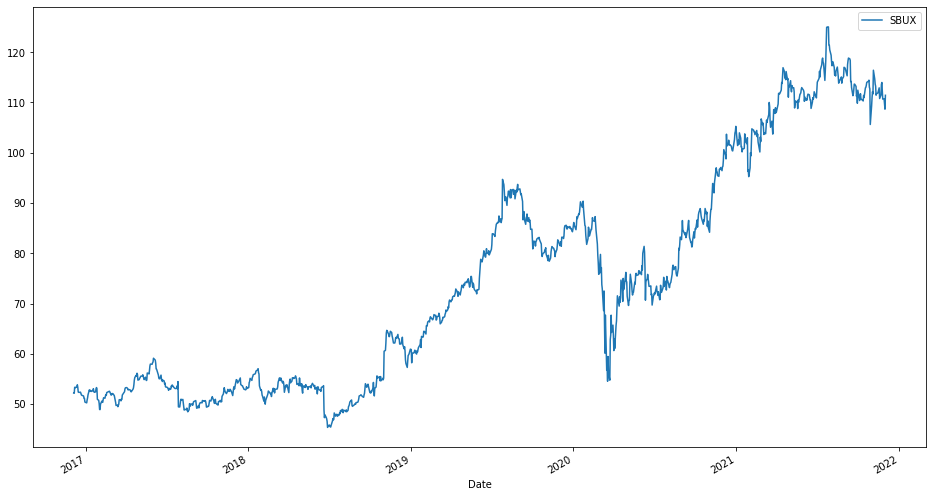

0.07231066878704784


In [29]:
from StockPuller import StockPuller

Puller = StockPuller()
Puller.plotStock(single_ticker)
print(Puller.changeOverDays(single_ticker, date, 1))




## 3. PerformanceTester

In [30]:
from PerformanceTesting import PerformanceTester

Tester = PerformanceTester()
articles = [[single_ticker, date, cleaned_text]]
Tester.loadArticles(articles)
Tester.setTimeframe('day', 1)
xy = Tester.aquireTargetValues()
X = xy[0]
y = xy[1]
print('This is the text in list format to input into the model: \n', [text[:1000] for text in X], '\n\n\n', 
        'This is the classification in list format (1 for positive movement 0 for negative movement):', y)


This is the text in list format to input into the model: 
 ['Company Name Starbucks Corp Company Ticker SBUX US Equity Date 20211028 Q4 2021 Earnings Call Company Participants Greg Smith Vice President Investor Relations L John Culver Group President North America Chief Operating Oﬃcer A N Kevin Johnson President Chief Executive Oﬃcer I F Leo Tsoi Chairman Chief Executive Oﬃcer Starbucks China Rachel Ruggeri Chief Financial Oﬃcer Unidentiﬁed Speaker Other Participants Andrew Charles David Tarantino Jeﬀrey Bernstein Analyst John Glass John Ivankoe John Tower Analyst Sara Senatore Sharon Zackﬁa t Unidentiﬁed Participant p r c Presentation s n Operator r T Good afternoon My Alex I conference operator today g I like welcome Starbucks Fourth Quarter Fiscal Year End 2021 r e Conference Call b m All lines placed mute prevent background noise After speakers remarks questionandanswer session Operator Instructions o o I turn Greg Smith Vice President Investor Relations Mr Smith l B begin confere

## 4. Transcripts

In [31]:
from store_transcripts import Transcripts


#load starbucks
store = Transcripts(single_ticker)
# remove if path is hard coded
store.path = path_to_project+"/transcripts/"+single_ticker+"_transcripts/"
transcripts = store.create_dct()
print(transcripts[0]['transcript'][:1000])


Company Name Starbucks Corp Company Ticker SBUX US Equity Date  Q  Earnings Call Company Participants Greg Smith Vice President Investor Relations L John Culver Group President North America Chief Operating Oﬃcer A N Kevin Johnson President Chief Executive Oﬃcer I F Leo Tsoi Chairman Chief Executive Oﬃcer Starbucks China Rachel Ruggeri Chief Financial Oﬃcer Unidentiﬁed Speaker Other Participants Andrew Charles David Tarantino Jeﬀrey Bernstein Analyst John Glass John Ivankoe John Tower Analyst Sara Senatore Sharon Zackﬁa t Unidentiﬁed Participant p r c Presentation s n Operator r T Good afternoon My Alex I conference operator today g I like welcome Starbucks Fourth Quarter Fiscal Year End  r e Conference Call b m All lines placed mute prevent background noise After speakers remarks questionandanswer session Operator Instructions o o I turn Greg Smith Vice President Investor Relations Mr Smith l B begin conference Greg Smith BIO  GO Good afternoon everyone thank joining today discuss Sta

## 5. Database

In [32]:
from store_transcripts import Database
from pymongo import MongoClient

#insert starbucks into starbucks_transcripts schema
Base = Database()
Base.db = MongoClient().starbucks_transcripts
Base.store_data([single_ticker])

SBUX transcripts stored successfully


Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'starbucks_transcripts')

### Import Transcripts for Top 20 NASDAQ Companies by Market Cap

In [33]:

''' To prevent "IOPub data rate exceeded error":
enter into terminal: jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 '''

# tickers = ['AAPL', 'ADBE', 'AMZN', 'ASML', 'AVGO', 'CMCSA', 'COST',  'CSCO', 'FB', 'GOOGL',
#            'INTC', 'MSFT', 'NFLX', 'NVDA', 'PDD', 'PEP', 'PYPL', 'TMUS', 'TSLA', 'TXN']

tickers = ['AAPL']
#for quick running
database = Database()
db = database.store_data(tickers)

                          Earnings Transcript C:/Users/mtort/Repositories/DS3500-Final-Project/transcripts/AAPL_transcripts/20161025_Apple_Inc-_Earnings_Call_2016-10-25_FS000000002309526172.pdf Not Added
                          
                          Earnings Transcript C:/Users/mtort/Repositories/DS3500-Final-Project/transcripts/AAPL_transcripts/20161025_Apple_Inc-_Earnings_Call_2016-10-25_FS000000002309526178.pdf Not Added
                          
AAPL transcripts stored successfully


## 6. Vectorizers

In [34]:
from vector_and_pca import Vectorizer

Creator = Vectorizer(tickers)
data, text = Creator.query_data()
tfidf_df, bag_of_words = Creator.tfidf(text)

C:\Users\mtort\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 7. Principal Component Analysis

In [35]:
data, text = Creator.query_data()
tfidf_df, bag_of_words = Creator.tfidf(text)

pca_df = Creator.create_pca_df(bag_of_words)
pca_df

,0,1,2,3,4,5,6,7,8,9,target
0,-3.967148,-23.105240,6.695564,42.108303,5.374081,-3.415959,31.618225,-15.086594,3.419643,-5.604518,0
1,-26.994659,-6.945654,-11.165368,19.239792,-1.783853,-4.502518,17.401264,-8.926629,-3.740986,-8.458455,0
2,-3.078801,-19.352774,0.600340,22.189966,11.012951,-22.263448,-25.459416,9.197036,-15.348100,19.383538,1
3,-26.579513,-5.103643,-14.771455,6.626267,1.371622,-15.593942,-17.679718,5.987743,-14.640184,6.638115,1
4,-3.101211,-36.187973,30.988854,-16.483366,-26.007841,2.859328,-12.869011,-19.853048,10.894046,3.531540,0
5,-25.765768,-15.775087,4.707030,-17.084419,-21.543875,-0.464732,-10.577427,-12.090755,1.249690,-2.431590,0
6,-4.008786,-8.895878,16.993633,-6.076685,-9.912499,11.759933,26.860056,41.661021,2.553414,12.981010,0
7,-26.201855,1.431506,-4.507703,-10.184406,-11.285285,5.115535,14.301205,25.740721,-3.761995,3.090027,0
8,-5.892787,0.188199,10.912186,-11.113753,36.599942,30.918918,4.672656,-17.606585,-8.345415,16.598956,1
9,-26.150771,6.205887,-6.378255,-13.342540,19.730586,19.018559,1.215013,-11.674504,-10.818176,6.509482,1


## 8. Base Models

In [36]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


### Dictionary of ML Algorithms

In [37]:
estimators = {
            'Logistic Regression' : LogisticRegression(), 
            'Support Vector Machine': LinearSVC(max_iter=1000000),
            'Gaussian Naive Bayes': GaussianNB(),
            'Decision Tree': DecisionTreeClassifier()}
parameters = ['Base', 'Cross-Validated GridSearch', 'KFold Cross-Validation']

### Create Empty Dataframe to Store Performance Metrics

In [38]:
from modeling_eval import Modeling
Modeler = Modeling()
print(Modeler.estimators)
print(Modeler.parameters)
pca_metric = Modeler.metrics_df()

{'Logistic Regression': LogisticRegression(), 'Support Vector Machine': LinearSVC(max_iter=1000000), 'Gaussian Naive Bayes': GaussianNB(), 'Decision Tree': DecisionTreeClassifier()}
['Base', 'Cross-Validated GridSearch', 'KFold Cross-Validation']


### Use Predefined Columns and Rows to Initialize Empty Dataset for Evaluation Metrics

In [39]:
Modeler.base_models(pca_df)

Logistic Regression :
Prediction accuracy on the test data: 71.43% 

Prediction accuracy on the test data: 100.00% 

Support Vector Machine :
Prediction accuracy on the test data: 71.43% 

Prediction accuracy on the test data: 100.00% 

Gaussian Naive Bayes :
Prediction accuracy on the test data: 42.86% 

Prediction accuracy on the test data: 90.00% 

Decision Tree :
Prediction accuracy on the test data: 85.71% 

Prediction accuracy on the test data: 100.00% 



C:\Users\mtort\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\mtort\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\mtort\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

## 10. Cross-Validation

In [40]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
Modeler.cross_validation(pca_df)

Logistic Regression :
Prediction accuracy on the training data: 100.00
Prediction accuracy on the test data: 71.43% 

Support Vector Machine :
Prediction accuracy on the training data: 100.00
Prediction accuracy on the test data: 71.43% 

Gaussian Naive Bayes :
Prediction accuracy on the training data: 90.00
Prediction accuracy on the test data: 42.86% 

Decision Tree :
Prediction accuracy on the training data: 100.00
Prediction accuracy on the test data: 57.14% 



# 11. Model Performance

In [41]:
Modeler.performance

Base                         \
                       Logistic Regression Support Vector Machine   
0            precision            1.000000               1.000000   
             recall               0.600000               0.600000   
             f1-score             0.750000               0.750000   
             support              5.000000               5.000000   
1            precision            0.500000               0.500000   
             recall               1.000000               1.000000   
             f1-score             0.666667               0.666667   
             support              2.000000               2.000000   
all          accuracy             0.714286               0.714286   
macro avg    precision            0.750000               0.750000   
             recall               0.800000               0.800000   
             f1-score             0.708333               0.708333   
             support              7.000000               7.000000   
weighted avg precision            0.857143               0.857143   
             recall               0.714286               0.714286   
             f1-score             0.726190               0.726190   
             support              7.000000               7.000000   

                                                           \
                       Gaussian Naive Bayes Decision Tree   
0            precision             0.600000      0.833333   
             recall                0.600000      1.000000   
             f1-score              0.600000      0.909091   
             support               5.000000      5.000000   
1            precision             0.000000      1.000000   
             recall                0.000000      0.500000   
             f1-score              0.000000      0.666667   
             support               2.000000      2.000000   
all          accuracy              0.428571      0.857143   
macro avg    precision             0.300000      0.916667   
             recall                0.300000      0.750000   
             f1-score              0.300000      0.787879   
             support               7.000000      7.000000   
weighted avg precision             0.428571      0.880952   
             recall                0.428571      0.857143   
             f1-score              0.428571      0.839827   
             support               7.000000      7.000000   

                       Cross-Validated GridSearch                         \
                              Logistic Regression Support Vector Machine   
0            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
1            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
all          accuracy                           0                      0   
macro avg    precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
weighted avg precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   

                                                           \
                       Gaussian Naive Bayes Decision Tree   

In [43]:
import numpy as np

# starbucks predictions
# Note: this is predicting sbux movement based on other ticekrs [AAPL, FB, etc]
# We are supposed to get a 1 but we get 0

Creator = Vectorizer(tickers)
Creator.db = MongoClient().starbucks_transcripts
data, text = Creator.query_data()
tfidf_df, bag_of_words = Creator.tfidf(text)
pca_df = Creator.create_pca_df(bag_of_words)
pca_df

X = np.array(pca_df[0]).reshape(-1, 1)
sbux_truth = Puller.changeOverDays('SBUX','20211028', 1)

print(f'True starbucks price movement is {sbux_truth}')
for name, model in estimators.items():
    print(f'The {name} model predicts {Modeler.models[name].predict(X)} for starbucks price movement')



ValueError: max_df corresponds to < documents than min_df